In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### Importing the dataframes

In [26]:
viz_dir = '../SavedStats/'
sc_filepath = viz_dir + 'social_simulation.csv'
bm_filepath = viz_dir + 'benchmark_simulation.csv'

df_sc = pd.read_csv(sc_filepath)
df_bm = pd.read_csv(bm_filepath)

In [148]:
df.head()

,GreenUsers,NormalUsers,Period,TotalEmission,SimulationIndex
0,29,21,0,4381.134071,0
1,28,22,1,4390.622138,0
2,30,20,2,4633.724382,0
3,30,20,3,4890.203713,0
4,31,19,4,5158.574913,0


In [28]:
def aggregate_emissions(df):
    return df.groupby('Period').agg({'TotalEmission':np.mean})['TotalEmission']

In [30]:
emissions = df.groupby('Period').agg({'TotalEmission':np.mean})['TotalEmission']
emissions

Period
0    374.449005
1    374.449005
2    396.664164
3    417.401488
4    440.037885
Name: TotalEmission, dtype: float64

In [157]:
periods = [i for i in range(len(emissions))]
periods

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Text(0.5, 0, 'Period')

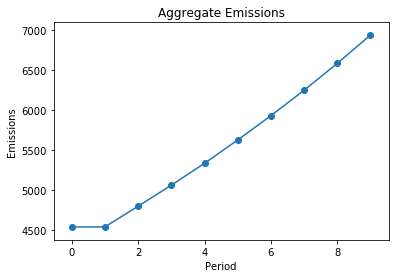

In [158]:
fig, ax = plt.subplots()
ax.plot( periods, emissions)
ax.scatter(periods, emissions)
ax.set_title('Aggregate Emissions')
ax.set_ylabel('Emissions')
ax.set_xlabel('Period')

### Graph benchmark and social on the same graph

In [164]:
df_bm.head()

,GreenUsers,NormalUsers,Period,TotalEmission,SimulationIndex
0,0,100,0,26144.611024,0
1,0,100,1,26144.611024,0
2,0,100,2,26144.611024,0
3,0,100,3,26144.611024,0
4,0,100,4,26144.611024,0


In [168]:
bm_emissions = aggregate_emissions(df_bm)

Text(0.5, 0, 'Period')

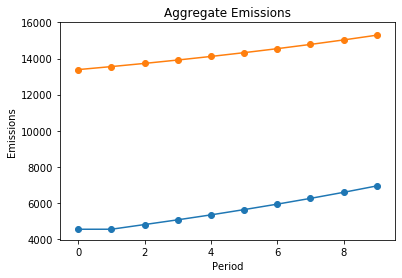

In [170]:
fig, ax = plt.subplots()
ax.plot( periods, emissions)
ax.scatter(periods, emissions)
ax.plot(periods, bm_emissions)
ax.scatter(periods, bm_emissions)
ax.set_title('Aggregate Emissions')
ax.set_ylabel('Emissions')
ax.set_xlabel('Period')

In [177]:
aggregate_emissions(df_bm)

Period
0    13387.330113
1    13554.110097
2    13730.702221
3    13917.678712
4    14115.644378
5    14325.238365
6    14546.770064
7    14781.663483
8    15030.326358
9    15293.554463
Name: TotalEmission, dtype: float64

In [187]:
def emissions_plotter(dfs, labels):
    fig, ax = plt.subplots()
    
    ax.set_title('Aggregate Emissions')
    ax.set_ylabel('Emissions')
    ax.set_xlabel('Period')
    
    
    for i,df in enumerate(dfs):
        emissions = aggregate_emissions(df)
        periods = [i for i in range(len(emissions))]
        
        ax.plot( periods, emissions, label=labels[i])
        ax.scatter(periods, emissions)
    ax.legend(loc='upper left')

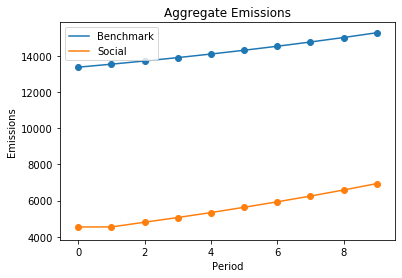

In [189]:
emissions_plotter([df_bm, df_sc],['Benchmark','Social'])

### Agent Graphing